# **Facial Emotion Detection**

## **Problem Definition**

**The context:** Why is this problem important to solve?<br> this problem is important to solve because building a model that accurately predicts facial expressions could have many real world applications, from flagging aggressive faces in an airport to
**The objectives:** What is the intended goal?<br>
**The key questions:** What are the key questions that need to be answered?
which neural network model gives the best predictions on correctly labeling the emotions when faced with new unlabeled images of facial expressions.
**The problem formulation:** What are we trying to solve using data science?



## **About the dataset**

The data set consists of 3 folders, i.e., 'test', 'train', and 'validation'.
Each of these folders has four subfolders:

**‘happy’**: Images of people who have happy facial expressions.<br>
**‘sad’**: Images of people with sad or upset facial expressions.<br>
**‘surprise’**: Images of people who have shocked or surprised facial expressions.<br>
**‘neutral’**: Images of people showing no prominent emotion in their facial expression at all.<br>


## **Mounting the Drive**

**NOTE:**  Please use Google Colab from your browser for this notebook. **Google.colab is NOT a library that can be downloaded locally on your device.**

In [33]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
picture_size = 48
folder_path = "Facial_emotion_images/"

## **Importing the Libraries**

In [35]:
#importing the libraries
import zipfile
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D,MaxPooling2D, Dense, Dropout, Flatten, BatchNormalization,Activation, LeakyReLU, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
import matplotlib.pyplot as plt
from matplotlib.image import imread
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model
from tensorflow.keras import Model
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import cv2
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from PIL import Image


### **Let us load and unzip the data**

**Note:**
- You must download the dataset from the link provided on Olympus and upload the same on your Google drive before executing the code in the next cell.
- In case of any error, please make sure that the path of the file is correct as the path may be different for you.

In [5]:
#loading and unzipping the data

path = '/content/drive/MyDrive/Facial_emotion_images.zip'


with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall()

In [6]:
#setting up the train, validation and test paths


train_path = path +'\\train\\'
validation_path = path +'\\validation\\'
test_path = path +'\\test\\'

In [7]:
#getting the contents of the Facial Emotion Images folder - there are 3 datasets inside this folder: Train, Validation and Test sets
print("The files inside the facial emotion images folder are:", os.listdir('Facial_emotion_images'))

The files inside the facial emotion images folder are: ['validation', 'train', 'test']


In [8]:
#Getting the directory of what is inside the Training folder
print("The contents of the Training folder are:", os.listdir(folder_path + "train"))

The contents of the Training folder are: ['happy', 'surprise', 'sad', 'neutral']


In [9]:
#Getting the directory of what is inside the validation folder
print("The contents of the Validation folder are:",os.listdir(folder_path + "validation"))

The contents of the Validation folder are: ['happy', 'surprise', 'sad', 'neutral']


In [10]:
#Getting the directory of what is inside the test folder
print("The contents of the test folder are:", os.listdir(folder_path + "test"))

The contents of the test folder are: ['happy', 'surprise', 'sad', 'neutral']


## **Visualizing our Classes**

Let's look at our classes.

**Write down your observation for each class. What do you think can be a unique feature of each emotion, that separates it from the remaining classes?**

### **Happy**

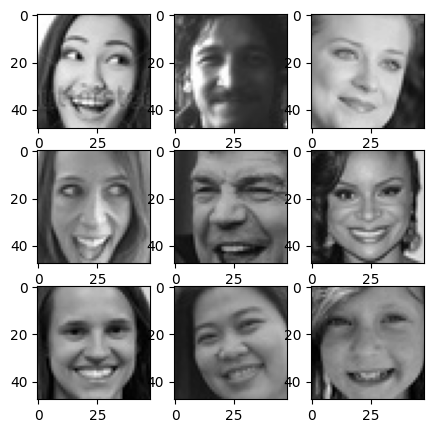

In [11]:
expression = 'happy'

plt.figure(figsize= (5,5))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)
    img = load_img(folder_path + "train/" + expression + "/" +
                  os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)

plt.show()

**Observations and Insights:__**

### **Sad**

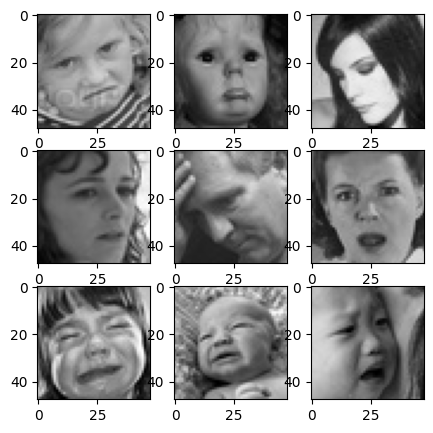

In [12]:
expression = 'sad'

plt.figure(figsize= (5,5))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)
    img = load_img(folder_path + "train/" + expression + "/" +
                  os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)

plt.show()

**Observations and Insights:__**

### **Neutral**

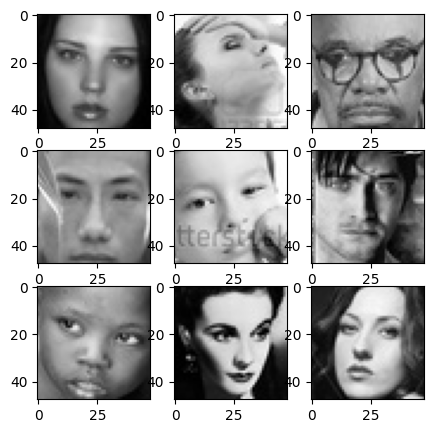

In [13]:
expression = 'neutral'

plt.figure(figsize= (5,5))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)
    img = load_img(folder_path + "train/" + expression + "/" +
                  os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)

plt.show()

**Observations and Insights:__**

### **Surprised**

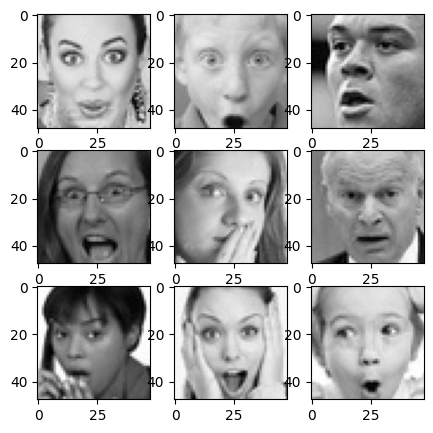

In [14]:

expression = 'surprise'

plt.figure(figsize= (5,5))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)
    img = load_img(folder_path + "train/" + expression + "/" +
                  os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)

plt.show()

**Observations and Insights:__**

## **Checking Distribution of Classes**

In [17]:
len(os.listdir(folder_path + "train/happy"))



3976

In [16]:
len(os.listdir(folder_path + "train/sad"))

3982

In [32]:
len(os.listdir(folder_path + "train/neutral"))

3978

In [18]:
len(os.listdir(folder_path + "train/surprise"))

3173

**Observations and Insights:__**

**Think About It:**
* Are the classes equally distributed? If not, do you think the imbalance is too high? Will it be a problem as we progress? The classes are mostly even between happy, sad and neutral. The one difference that shows up is in the surprise class. there are about 800 fewer samples in that class compared to the other classes. it is not too high.
* Are there any Exploratory Data Analysis tasks that we can do here? Would they provide any meaningful insights?

## **Creating our Data Loaders**

In this section, we are creating data loaders that we will use as inputs to our Neural Network.

**You have two options for the color_mode. You can set it to color_mode = 'rgb' or color_mode = 'grayscale'. You will need to try out both and see for yourself which one gives better performance.**

In [36]:
# Creating Image generators, for all train, validation, and test set
training_gen=ImageDataGenerator(rescale=1./255)
validation_gen=ImageDataGenerator(rescale=1./255)
testing_gen=ImageDataGenerator(rescale=1./255)


In [37]:
train_set = training_gen.flow_from_directory(folder_path + "train/",
                                              target_size = (48, 48),
                                              color_mode = 'grayscale',
                                              batch_size = 32,
                                              class_mode = 'categorical',
                                      )

validation_set = validation_gen.flow_from_directory(folder_path + "validation/",
                                              target_size = (48, 48),
                                              color_mode = 'grayscale',
                                              batch_size = 32,
                                              class_mode = 'categorical',
                                             )

test_set = testing_gen.flow_from_directory(folder_path + "test/",
                                              target_size = (48, 48),
                                              color_mode = 'grayscale',
                                              batch_size = 32,
                                              class_mode = 'categorical',
                                              )

Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


## **Model Building**

**Think About It:**
# * Are Convolutional Neural Networks the right approach? Should we have gone with Artificial Neural Networks instead? CNN is very effective for emotion recognition tasks [ 18 ]. They can extract features from input images, and then use these features to train a classifier. Once the classifier is trained, it can be used to recognize images. The advantage of using a CNN is that it is able to learn complex patterns in input images.  can extract features from input images, and then use these features to train a classifier. Once the classifier is trained, it can be used to recognize images. The advantage of using a CNN is that it is able to learn complex patterns in input images. can detect edges, curves, lines etc through the filters which are helpful as facial expressions are composaed of patterns of edges, lines etc. good at extracting features from images.
---



---


* What are the advantages of CNNs over ANNs and are they applicable here? the advantages of CNN is that they have convolutional layers which have filters. some filters detect edges, lines, patterns etc. which are helpful in detecting emotional expressions

### **Creating the Base Neural Network**

In [40]:
#setting the parameters for first CNN model based on grayscale

model1_grayscale = Sequential()

#first convolutional block
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same", input_shape=(48,48,1), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

#2nd convolutional block
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

#third convolutional block
model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same", activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))


#4th convolutionL network
model.add(Conv2D(filters=256,kernel_size=(3,3),padding="same", activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

#flatten layer
model.add(layers.Flatten())

#hidden layer
model.add(Dense(312), activation ="relu")
model.add(BatchNormalization())

#Adding a dropout layer - which some neurons are randomly shut off (by zeroing the values). this is a regularization technique to help with overfitting in the model and help model generalize better.
model.add(Dropout(0.5))
#output layer with 4 classes using softmax activation function
model.add(Dense(4, activation='softmax'))




ValueError: ignored

### **Compiling and Training the Model**

In [ ]:
#compiling the model with the optimizer Adam and learning rate of 0.001, using the loss function of cross entropy - used for categorical output variables
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])
tf.keras.optimizers.Adam(
    learning_rate=0.001,
        name="Adam",)

### **Evaluating the Model on the Test Set**

In [ ]:
#setting the parameters for CNN model for RGB mode
model = Sequential()

#first convolutional block
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same", input_shape=(48,48,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

#2nd convolutional block
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same"))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

#third convolutional block
model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same"))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))


#4th convolutionL network
model.add(Conv2D(filters=256,kernel_size=(3,3),padding="same"))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

#flatten layer
model.add(layers.Flatten())

#hidden layer
model.add(Dense(312), activation ="relu")
model.add(BatchNormalization())
#Adding a dropout layer - which some neurons are randomly shut off (by zeroing the values). this is a regularization technique to help with overfitting in the model and help model generalize better.
model.add(Dropout(0.5))
#output layer with 4 classes using softmax activation function
model.add(Dense(4, activation = 'softmax'))

In [ ]:
#compiling the model with the optimizer Adam and learning rate of 0.001, using the loss function of cross entropy - used for categorical output variables
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])
tf.keras.optimizers.Adam(
    learning_rate=0.001,
        name="Adam",)

**Observations and Insights:__**

### **Creating the second Convolutional Neural Network**

- Try out a slightly larger architecture

### **Compiling and Training the Model**

### **Evaluating the Model on the Test Set**

**Observations and Insights:__**

## **Think About It:**

* Did the models have a satisfactory performance? If not, then what are the possible reasons?
* Which Color mode showed better overall performance? What are the possible reasons? Do you think having 'rgb' color mode is needed because the images are already black and white?

## **Transfer Learning Architectures**

In this section, we will create several Transfer Learning architectures. For the pre-trained models, we will select three popular architectures namely, VGG16, ResNet v2, and Efficient Net. The difference between these architectures and the previous architectures is that these will require 3 input channels while the earlier ones worked on 'grayscale' images. Therefore, we need to create new DataLoaders.

### **Creating our Data Loaders for Transfer Learning Architectures**

In this section, we are creating data loaders that we will use as inputs to our Neural Network. We will have to go with color_mode = 'rgb' as this is the required format for the transfer learning architectures.

## **VGG16 Model**

### **Importing the VGG16 Architecture**

### **Model Building**

- Import VGG16 upto the layer of your choice and add Fully Connected layers on top of it.

### **Compiling and Training the VGG16 Model**

### **Evaluating the VGG16 model**

**Think About It:**

- What do you infer from the general trend in the training performance?
- Is the training accuracy consistently improving?
- Is the validation accuracy also improving similarly?

**Observations and Insights:__**

**Note: You can even go back and build your own architecture on top of the VGG16 Transfer layer and see if you can improve the performance**

## **ResNet V2 Model**

### **Model Building**

- Import Resnet v2 upto the layer of your choice and add Fully Connected layers on top of it.

### **Compiling and Training the Model**

### **Evaluating the ResNet Model**

**Observations and Insights:__**

**Note: You can even go back and build your own architecture on top of the ResNet Transfer layer and see if you can improve the performance.**

## **EfficientNet Model**

### **Model Building**

- Import EfficientNet upto the layer of your choice and add Fully Connected layers on top of it.

### **Compiling and Training the Model**

### **Evaluating the EfficientnetNet Model**

**Observations and Insights:__**

**Note: You can even go back and build your own architecture on top of the VGG16 Transfer layer and see if you can improve the performance.**

**Think About It:**

* What is your overall performance of these Transfer Learning Architectures? Can we draw a comparison of these models' performances. Are we satisfied with the accuracies that we have received?
* Do you think our issue lies with 'rgb' color_mode?

Now that we have tried multiple pre-trained models, let's build a complex CNN architecture and see if we can get better performance.

## **Building a Complex Neural Network Architecture**

In this section, we will build a more complex Convolutional Neural Network Model that has close to as many parameters as we had in our Transfer Learning Models. However, we will have only 1 input channel for our input images.

## **Creating our Data Loaders**

In this section, we are creating data loaders which we will use as inputs to the more Complicated Convolutional Neural Network. We will go ahead with color_mode = 'grayscale'.

### **Model Building**

- Try building a layer with 5 Convolutional Blocks and see if performance increases.

### **Compiling and Training the Model**

### **Evaluating the Model on Test Set**

**Observations and Insights:__**

### **Plotting the Confusion Matrix for the chosen final model**

**Observations and Insights:__**

## **Conclusion:____________**

### **Insights**

### **Refined insights**:
- What are the most meaningful insights from the data relevant to the problem?

### **Comparison of various techniques and their relative performance**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

### **Proposal for the final solution design**:
- What model do you propose to be adopted? Why is this the best solution to adopt?